In [1]:
import pandas as pd
import numpy as np
import time
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dfspac = pd.read_excel('deSPACed.xlsx')
dfspac

,DeSPAC Ticker,DeSPAC Company,SPAC Ticker/Name,Pre-Merger Name,Compl. Date,Comm. Rtrn %,Ann. Return %,Comm. Price,Comm. % Chg,Mkt. Cap,...,IPO Size (M),Target Focus,Prom. Leaders,Underwriters,Clos. PR Link,SEC Filings,Post-Close S-1 File Date,S-1 Effective Date,Warr. Ex. Date,Warr. Ex D.L.
0,RGTI,"Rigetti Computing, Inc.","SNII Supernova Partners Acquisition Co II, Ltd.",NaN,2022-03-02,-0.244,-0.239,7.56,0.108,7.658340e+08,...,345.0,Tech (Enterprise),"Spencer Rascoff (Co-founder/ Fmr CEO, Zi...",J.P. Morgan,Clos. PR Link,SEC Filings,NaT,NaT,2022-04-02,NaT
1,QTEK,QualTek Services Inc.,ROCR Roth CH Acquisition III Co.,NaN,2022-02-14,-0.712,-0.699,2.88,0.087,0.000000e+00,...,115.0,"Business Services, Consumer, Healthcare,...","Byron Roth (CEO, Roth)","Roth Capital Partners, Craig-Hallum Capi...",Clos. PR Link,SEC Filings,2021-08-26,2022-02-15,2022-03-14,NaT
2,ISPO,Inspirato Incorporated,TVAC Thayer Ventures Acquisition Corp,NaN,2022-02-11,0.411,0.331,14.11,-0.075,2.433975e+08,...,176.0,Travel and Transportation Tech,"Mark Farrell (Managing Director, Thayer ...","Stifel, Oppenheimer",Clos. PR Link,SEC Filings,2022-02-02,2022-02-14,2022-03-11,NaT
3,NRGV,"Energy Vault, Inc.",NXU Novus Capital Corporation II,NaN,2022-02-11,0.216,0.198,12.16,0.040,0.000000e+00,...,287.5,"Smart Tech, 5G communication, VR, AI, Cl...",Robert Laikin (Founder of L7 Investments...,Cowen,Clos. PR Link,SEC Filings,2022-02-14,NaT,2022-03-11,NaT
4,CPTN,"Cepton, Inc.",GCAC Growth Capital Acquisition Corp.,"Cepton Technologies, Inc.",2022-02-10,-0.191,-0.173,8.09,-0.100,1.246248e+09,...,172.5,NaN,Prokopios Tsirigakis (CEO of Nautilus En...,Maxim,Clos. PR Link,SEC Filings,2021-11-03,NaT,2022-03-10,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,ATCX,Atlas Technical Consultants,BWMC Boxwood Merger Corp,Atlas Intermediate Holdings,2020-02-14,0.123,0.037,11.23,0.030,3.775101e+08,...,200.0,"Technical Services, Industrial Services","Steve Kadenacy (Former COO, AECOM)","BofA Merrill Lynch, Morgan Stanley, Macq...",Clos. PR Link,SEC Filings,NaT,NaT,NaT,NaT
280,ALTG,Alta Equipment Group Inc,BRPM B. Riley Principal Merger Corp,NaN,2020-02-14,0.235,0.081,12.35,0.030,3.996877e+08,...,143.8,NaN,Kenneth Young (President of B. Riley Fin...,B. Riley FBR,Clos. PR Link,SEC Filings,NaT,NaT,2020-04-09,NaT
281,VRT,Vertiv Holdings Co,GSAH GS Acquisition Holdings Corp,Veritiv Holdings (Platinum Equity Portfolio Co...,2020-02-10,0.092,0.025,10.92,0.072,4.105832e+09,...,600.0,NaN,"Goldman Sachs, David Cote (Former CEO, H...",Goldman Sachs,Clos. PR Link,SEC Filings,NaT,NaT,NaT,2021-01-18
282,PAE,PAE Inc,GRSH Gores Holdings III,PAE (Platinum Equity Portfolio Company),2020-02-10,NaN,NaN,NaN,NaN,NaN,...,375.0,NaN,Gores Group,Deutsche Bank,Clos. PR Link,SEC Filings,NaT,NaT,2020-03-10,NaT


In [4]:
dfspac.describe()

,Comm. Rtrn %,Ann. Return %,Comm. Price,Comm. % Chg,Mkt. Cap,Warr. Price,IPO Size (M)
count,281.000000,273.000000,282.000000,281.000000,2.820000e+02,204.000000,284.000000
mean,-0.344125,-0.202022,6.570957,0.041826,1.208533e+09,1.143725,302.190493
std,0.516327,0.307850,5.158149,0.081796,2.832297e+09,1.771379,231.825820
min,-0.983000,-0.764000,0.170000,-0.370000,0.000000e+00,0.060000,40.000000
25%,-0.668000,-0.369000,3.337500,0.008000,2.146518e+08,0.430000,172.500000
50%,-0.461000,-0.235000,5.405000,0.034000,5.563933e+08,0.750000,253.000000
75%,-0.170000,-0.099000,8.330000,0.066000,1.249725e+09,1.332500,345.000000
max,3.548000,1.910000,45.480000,0.838000,4.176127e+10,20.330000,2070.000000


# Visualize Return Distribution

The majority of SPAC has annual return and return since inception lower than 0.
Therefore, if investors still like the flexibility of this vehicle, they must analyze the underlying company carefully.

In [5]:
# Percentage of de-SPACed companies that had positive returns since inception.
len(dfspac[dfspac['Comm. Rtrn %']<0])/len(dfspac)

0.8380281690140845

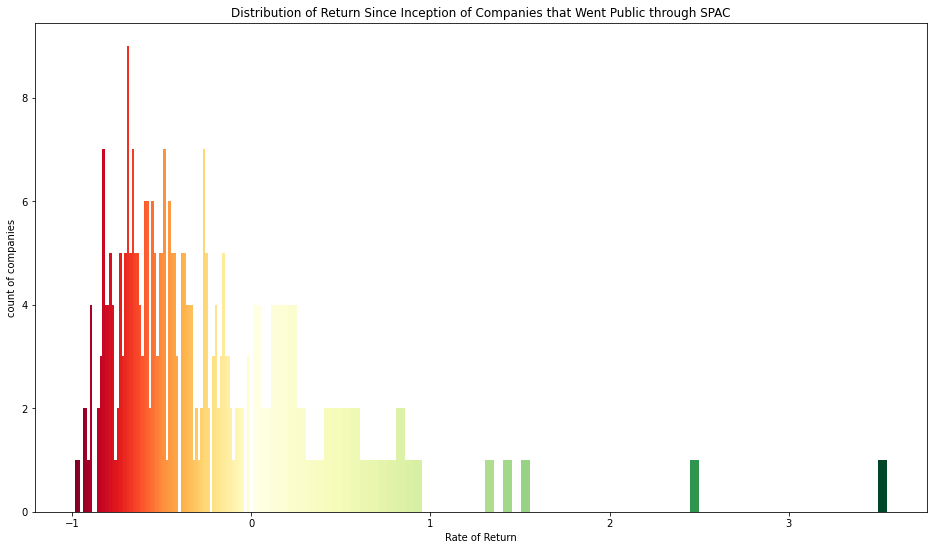

In [7]:
# Returns since Inception
data = dfspac['Comm. Rtrn %']
left_data = [i for i in data if i < 0]
right_data = [i for i in data if i >= 0]

def hist2(x, vmin, vmax, cmmap_name, ax=None,):

    cm = plt.cm.get_cmap(cmmap_name)
    ax = ax or plt.gca()
    _, bins, patches = ax.hist(x,color="r",bins=int(len(data)/4))

    bin_centers = 0.5*(bins[:-1]+bins[1:])
    norm = plt.Normalize(vmin, vmax)

    for c, p in zip(bin_centers, patches):
        plt.setp(p, "facecolor", cm(norm(c)))

fig, ax = plt.subplots(figsize=(16, 9))
hist2(left_data, min(left_data), max(left_data), "YlOrRd_r", ax=ax)
hist2(right_data, min(right_data), max(right_data), "YlGn", ax=ax)

plt.xlabel('Rate of Return')
plt.ylabel('count of companies')
plt.title("Distribution of Return Since Inception of Companies that Went Public through SPAC")

plt.show()

We can filter by inception year to account for different time since inception.

In [9]:
dfspac['Compl. Year'] = pd.DatetimeIndex(dfspac['Compl. Date']). year
dfspac['Compl. Year'].drop_duplicates()

0      2022
22     2021
221    2020
Name: Compl. Year, dtype: int64

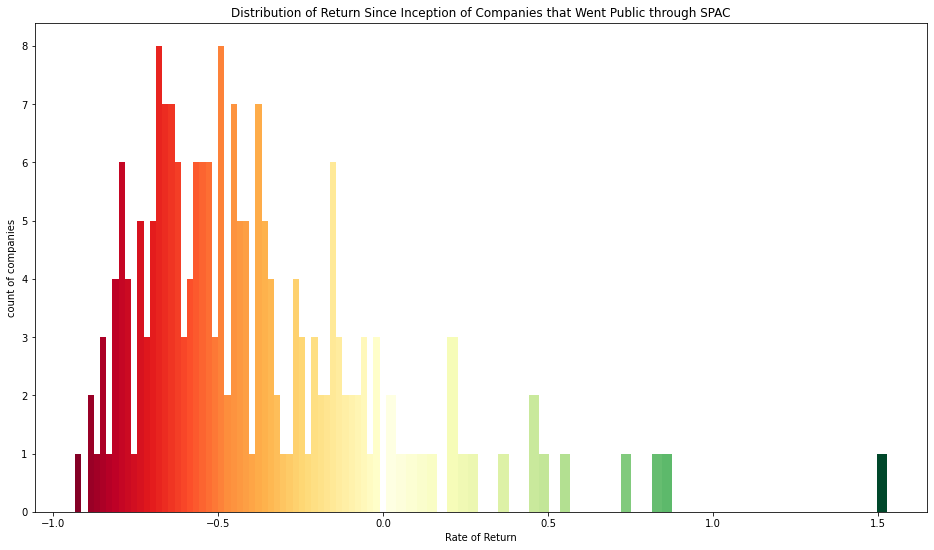

In [13]:
data = dfspac[dfspac['Compl. Year'] == 2021]['Comm. Rtrn %']
left_data = [i for i in data if i < 0]
right_data = [i for i in data if i >= 0]

def hist2(x, vmin, vmax, cmmap_name, ax=None,):

    cm = plt.cm.get_cmap(cmmap_name)
    ax = ax or plt.gca()
    _, bins, patches = ax.hist(x,color="r",bins=int(len(data)/4))

    bin_centers = 0.5*(bins[:-1]+bins[1:])
    norm = plt.Normalize(vmin, vmax)

    for c, p in zip(bin_centers, patches):
        plt.setp(p, "facecolor", cm(norm(c)))

fig, ax = plt.subplots(figsize=(16, 9))
hist2(left_data, min(left_data), max(left_data), "YlOrRd_r", ax=ax)
hist2(right_data, min(right_data), max(right_data), "YlGn", ax=ax)

plt.xlabel('Rate of Return')
plt.ylabel('count of companies')
plt.title("Distribution of Return Since Inception of Companies that Went Public through SPAC")

plt.show()

# Plotting SPCX and DSPC against S&P 500

## Fetch data from yfinance

In [61]:
import yfinance as yf
stock_list = ['SPY', 'SPCX', 'DSPC']
print('stock_list:', stock_list)
data = yf.download(stock_list, start="2020-01-01", end="2022-03-10")
print('data fields downloaded:', set(data.columns.get_level_values(0)))
data

stock_list: ['SPY', 'SPCX', 'DSPC']
[*********************100%***********************]  3 of 3 completed
data fields downloaded: {'Volume', 'Open', 'High', 'Adj Close', 'Close', 'Low'}


Adj Close                         Close                         \
                DSPC       SPCX         SPY   DSPC       SPCX         SPY   
Date                                                                        
2020-01-02       NaN        NaN  309.694946    NaN        NaN  324.869995   
2020-01-03       NaN        NaN  307.349854    NaN        NaN  322.410004   
2020-01-06       NaN        NaN  308.522308    NaN        NaN  323.640015   
2020-01-07       NaN        NaN  307.654907    NaN        NaN  322.730011   
2020-01-08       NaN        NaN  309.294556    NaN        NaN  324.450012   
...              ...        ...         ...    ...        ...         ...   
2022-03-03     13.28  27.650000  428.754150  13.28  27.650000  435.709991   
2022-03-04     12.01  27.620001  425.270691  12.01  27.620001  432.170013   
2022-03-07     12.01  27.590000  412.734070  12.01  27.590000  419.429993   
2022-03-08     12.01  27.580000  409.604858  12.01  27.580000  416.250000   
2022-03-09     12.75  27.600000  420.586670  12.75  27.600000  427.410004   

             High                           Low                          Open  \
             DSPC       SPCX         SPY   DSPC       SPCX         SPY   DSPC   
Date                                                                            
2020-01-02    NaN        NaN  324.890015    NaN        NaN  322.529999    NaN   
2020-01-03    NaN        NaN  323.640015    NaN        NaN  321.100006    NaN   
2020-01-06    NaN        NaN  323.730011    NaN        NaN  320.359985    NaN   
2020-01-07    NaN        NaN  323.540009    NaN        NaN  322.239990    NaN   
2020-01-08    NaN        NaN  325.779999    NaN        NaN  322.670013    NaN   
...           ...        ...         ...    ...        ...         ...    ...   
2022-03-03  13.28  27.674000  441.109985  13.28  27.100000  433.799988  13.28   
2022-03-04  12.01  27.650000  433.369995  11.99  27.549999  427.880005  11.99   
2022-03-07  12.01  27.600000  432.299988  12.01  27.559999  419.359985  12.01   
2022-03-08  12.01  27.620001  427.209991  12.01  27.500000  415.119995  12.01   
2022-03-09  12.78  27.639999  429.510010  12.72  27.570000  422.820007  12.76   

                                   Volume                      
                 SPCX         SPY    DSPC     SPCX        SPY  
Date                                                           
2020-01-02        NaN  323.540009     NaN      NaN   59151200  
2020-01-03        NaN  321.160004     NaN      NaN   77709700  
2020-01-06        NaN  320.489990     NaN      NaN   55653900  
2020-01-07        NaN  323.019989     NaN      NaN   40496400  
2020-01-08        NaN  322.940002     NaN      NaN   68296000  
...               ...         ...     ...      ...        ...  
2022-03-03  27.590000  440.470001     0.0  27200.0  105501700  
2022-03-04  27.549999  431.750000  1500.0   4000.0  113978200  
2022-03-07  27.559999  431.549988     0.0   4700.0  137896600  
2022-03-08  27.500000  419.619995   300.0   8100.0  164772700  
2022-03-09  27.570000  425.140015  3400.0   7100.0  116990800  

[551 rows x 18 columns]

In [62]:
assets = data['Close'] # get the close price of the assets
assets

,DSPC,SPCX,SPY
Date,,,
2020-01-02,NaN,NaN,324.869995
2020-01-03,NaN,NaN,322.410004
2020-01-06,NaN,NaN,323.640015
2020-01-07,NaN,NaN,322.730011
2020-01-08,NaN,NaN,324.450012
...,...,...,...
2022-03-03,13.28,27.650000,435.709991
2022-03-04,12.01,27.620001,432.170013
2022-03-07,12.01,27.590000,419.429993


We know S&P 500 has been around for a long time, but SPCX and DSPC are newer assets. Therefore, we need to truncate the data from the first day where all close prices are present.

In [63]:
# Create a "date" column based on the dataset's index
assets['date'] = assets.index 

# Find the first day where all assets are present
firstDateofAll = assets[(assets['DSPC'].notnull()) & (assets['SPCX'].notnull())]['date'].min() 

# Filter days where any of the assets' close prices have not been recorded
assets_trimmed = assets.query('date >= @firstDateofAll').sort_values(by='Date',ascending=True)

# Drop the "date" column (we only need the index for plotting)
assets_trimmed.drop(columns = {'date'}, inplace = True)

# Inspect
assets_trimmed

C:\Users\Nam Nguyen\AppData\Local\Temp\ipykernel_12816\3691513853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assets['date'] = assets.index


,DSPC,SPCX,SPY
Date,,,
2021-05-20,25.503000,28.350000,415.279999
2021-05-21,25.590000,28.379999,414.940002
2021-05-24,25.743999,28.350000,419.170013
2021-05-25,25.252001,28.389999,418.239990
2021-05-26,26.476000,28.500000,419.070007
...,...,...,...
2022-03-03,13.280000,27.650000,435.709991
2022-03-04,12.010000,27.620001,432.170013
2022-03-07,12.010000,27.590000,419.429993


Due to different prices, we need to normalize all close prices, so that interpretations can be made from $1 since the first day of the time frame.

In [64]:
assets_dollar = assets_trimmed
assets_dollar['SPY'] = assets_dollar['SPY']/assets_dollar['SPY'][0]
assets_dollar['SPCX'] = assets_dollar['SPCX']/assets_dollar['SPCX'][0]
assets_dollar['DSPC'] = assets_dollar['DSPC']/assets_dollar['DSPC'][0]
assets_dollar

,DSPC,SPCX,SPY
Date,,,
2021-05-20,1.000000,1.000000,1.000000
2021-05-21,1.003411,1.001058,0.999181
2021-05-24,1.009450,1.000000,1.009367
2021-05-25,0.990158,1.001411,1.007128
2021-05-26,1.038152,1.005291,1.009126
...,...,...,...
2022-03-03,0.520723,0.975309,1.049196
2022-03-04,0.470925,0.974250,1.040671
2022-03-07,0.470925,0.973192,1.009993


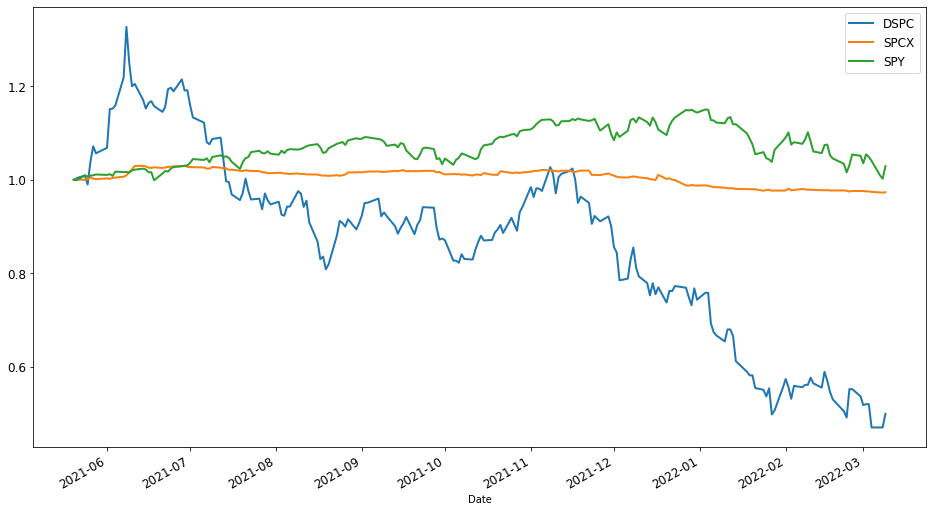

In [65]:
# Plot the assets together
ax = assets_dollar.plot(linewidth=2, fontsize=12, figsize = (16,9));
# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

__Pick a different start day and end day:__

[*********************100%***********************]  3 of 3 completed


C:\Users\Nam Nguyen\AppData\Local\Temp\ipykernel_12816\2904131753.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assets['date'] = assets.index


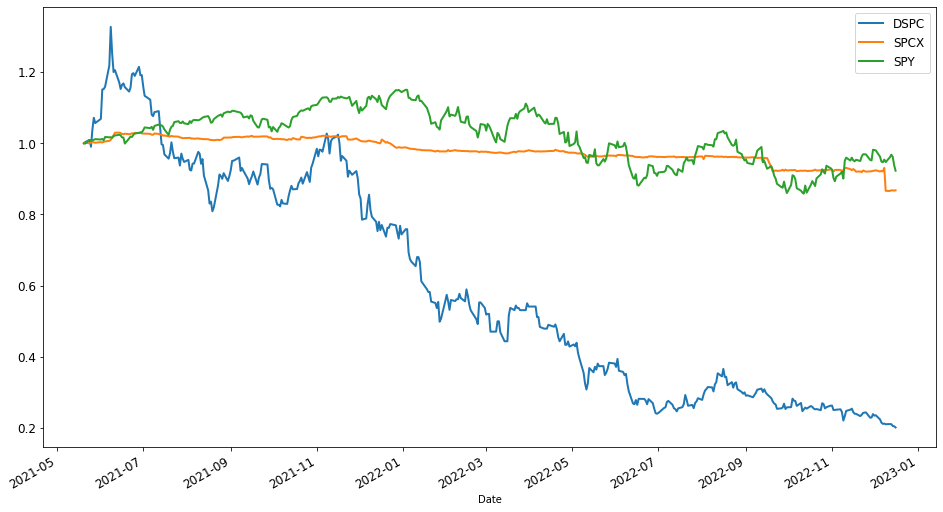

In [72]:
start="2020-01-01"
end="2022-12-18"

stock_list = ['SPY', 'SPCX', 'DSPC']
data = yf.download(stock_list, start=start, end=end)

assets = data['Close'] # get the close price of the assets

# Create a "date" column based on the dataset's index
assets['date'] = assets.index 

# Find the first day where all assets are present
firstDateofAll = assets[(assets['DSPC'].notnull()) & (assets['SPCX'].notnull())]['date'].min() 

# Filter days where any of the assets' close prices have not been recorded
assets_trimmed = assets.query('date >= @firstDateofAll').sort_values(by='Date',ascending=True)

# Drop the "date" column (we only need the index for plotting)
assets_trimmed.drop(columns = {'date'}, inplace = True)

assets_dollar = assets_trimmed
assets_dollar['SPY'] = assets_dollar['SPY']/assets_dollar['SPY'][0]
assets_dollar['SPCX'] = assets_dollar['SPCX']/assets_dollar['SPCX'][0]
assets_dollar['DSPC'] = assets_dollar['DSPC']/assets_dollar['DSPC'][0]

# Plot the assets together
ax = assets_dollar.plot(linewidth=2, fontsize=12, figsize = (16,9));
# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);